In [1]:
import cv2
import numpy as np

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

### Q1. Write a function to increase the brightness of an image with image and brightness value as inputs. Verify the function using elephants.jpg.

In [52]:
img= cv2.imread('elephants.jpg')

**One way to see the image is using CV2's imshow or to save it using OS commands and then add it here.**

In [93]:
#display the image
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**But from now-onwards we will use Matplotlib's imshow, which shows the image using RGB format. So before passing the image to imshow, we have to convert it into RGB. So let's do this**

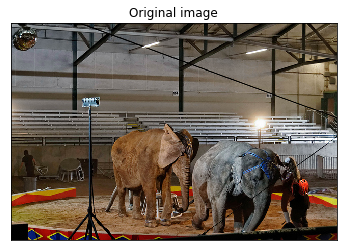

In [54]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.xticks([])
plt.yticks([])
plt.show()

#### To tweak the brightness of an image, there are many ways, but I am going to make use of HSV format of images where V denotes the lighting intensity of an image and making changes to those values can help in increase the brightness.

In [67]:
def br_inc(imagetowork,b_value=30):
    hsvimg = cv2.cvtColor(imagetowork, cv2.COLOR_BGR2HSV)
    
    vValue = hsvimg[:,:,2]
    hsvimg[:,:,2] = np.where((255-vValue)<b_value,255,vValue+b_value)
    
    return cv2.cvtColor(hsvimg,cv2.COLOR_HSV2RGB)

**Our function is ready. Now remember that the value returned by the function is in RGB format, so that we can work with Matplotlib to see the image**

#### Let's use the function and see how our Elephant image changes

In [68]:
result=br_inc(img,50)

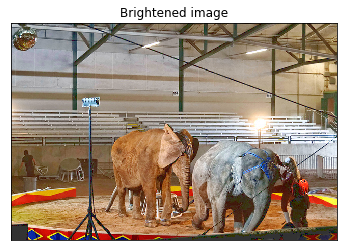

In [71]:
plt.imshow(result)
plt.title('Brightened image')
plt.xticks([])
plt.yticks([])
plt.show()

#### And that's it

### Q2. Create a custom function to translate an image without using any external library. Only use cv2 to load an image and numpy to do all the matrix operations. Verify the function using elephants.jpg

**So how will we do this without any library?**

**Well the way to do this is padding the image from all the four sides(or two sides) with zeros.**

In [78]:
#Original image shape
img.shape

(427, 640, 3)

**Now we create an array of same shape but larger sized zeros**

In [118]:
shift_img=np.zeros((427+80+80,640+80+80,3))

**Now just change the pixel values of non-padded area equal to the original image**

In [119]:
shift_img[80:507,80:720]=img

In [120]:
# Do remember to convert dtype to uint8
shift_img=shift_img.astype('uint8')

**And there it is:**

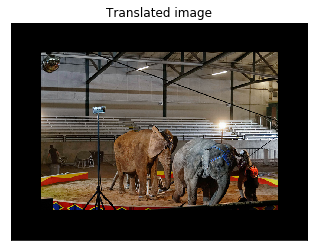

In [138]:
plt.imshow(cv2.cvtColor(shift_img,cv2.COLOR_BGR2RGB))
plt.title('Translated image')
plt.xticks([])
plt.yticks([])
plt.show()

**Works perfectly well**

**Now we need to create a function to perform all this. So let's first set the terms we will use to call the padding areas**
```
Upper padding named as up
Lower as lo
Left as le
Right as ri
```

In [132]:
def translate(imagetowork2,padshapes=[80,80,80,80]):
    img_shift=np.zeros((imagetowork2.shape[0]+padshapes[0]+padshapes[1],imagetowork2.shape[1]+padshapes[2]+padshapes[3],3))
    
    img_shift[padshapes[0]:imagetowork2.shape[0]+padshapes[0],padshapes[2]:imagetowork2.shape[1]+padshapes[2]]=imagetowork2
    # Do remember to convert dtype to uint8
    img_shift=img_shift.astype('uint8')
    
    return img_shift

In [135]:
result2=translate(img,padshapes=[110,50,164,95])

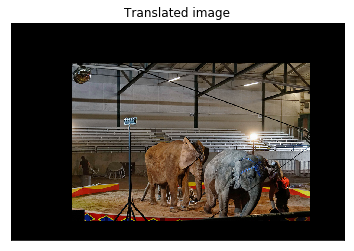

In [137]:
plt.imshow(cv2.cvtColor(result2,cv2.COLOR_BGR2RGB))
plt.title('Translated image')
plt.xticks([])
plt.yticks([])
plt.show()

**And that's pretty much it**